In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import UpSampling2D, Flatten, Activation
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras import backend as k

from keras.datasets import cifar10

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 

In [2]:
(X_train, y_train), (X_test, y_test) =  cifar10.load_data()

In [3]:
print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (50000, 32, 32, 3)
Size of the test_set:  (10000, 32, 32, 3)
Shape of each image:  (32, 32, 3)
Total number of classes:  10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Lets plot and see what the images look like

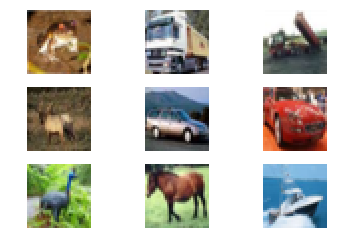

In [5]:
# Plot of 9 random images
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(X_train[i]) 

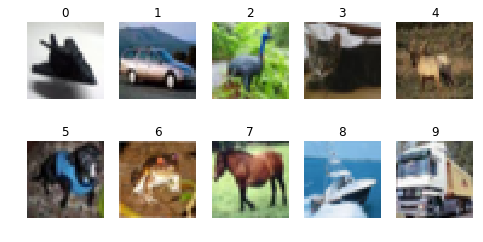

In [6]:
# plot of an image from each class
fig=plt.figure(figsize=(8, 4))
columns = 5
rows = 2
for i in range(0, rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.title(str(i)) # label 
    plt.axis('off') # turn off axis
    plt.imshow(X_train[np.where(y_train==i)[0]][0]) # gray scale
plt.show()

In [7]:
# We have a dataset with 50000 images with each image having a shape of 32*32
# The CIFAR10 dataset has 10 different classes. 

In [8]:
print('Maximum pixel value in the training_set: ', np.max(X_train))
print('Minimum pixel value in the training_set: ', np.min(X_train))

Maximum pixel value in the training_set:  255
Minimum pixel value in the training_set:  0


In [9]:
# Converting integer values to float types 
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [10]:
print('Maximum pixel value in the training_set (float): ', np.max(X_train))
print('Minimum pixel value in the training_set (float): ', np.min(X_train))

Maximum pixel value in the training_set (float):  255.0
Minimum pixel value in the training_set (float):  0.0


In [11]:
# Scaling the data is an important preprocessing.
# For scaling, we will divide each centered image by 255

In [12]:
# Scaling
X_train = X_train / 255
X_test = X_test / 255
print('Maximum pixel value in the training_set after Scaling: ', np.max(X_train))
print('Minimum pixel value in the training_set after Scaling: ', np.min(X_train))

Maximum pixel value in the training_set after Scaling:  1.0
Minimum pixel value in the training_set after Scaling:  0.0


In [13]:
#Function to rescale the pixel values to range between 0 and 255
def upscale(image):
    return (image*255).astype(np.uint8)

In [14]:
# Lets see if this works
z = upscale(X_train[0])
print('Maximum pixel value after upscaling centered and scaled image: ',np.max(z))
print('Maximum pixel value after upscaling centered and scaled image: ',np.min(z))

Maximum pixel value after upscaling centered and scaled image:  255
Maximum pixel value after upscaling centered and scaled image:  0


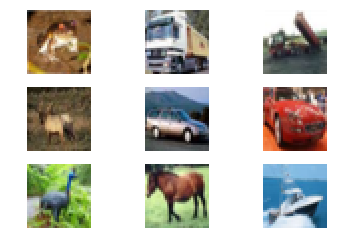

In [15]:
# Plot of 9 scaled images after upscaling
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(upscale(X_train[i])) 


In [16]:
# Clear the GPU memory with 
k.clear_session()

## Using Mean Squared Error as the loss function

In [17]:
batch_size = 128
epochs = 40
input_shape = (32,32,3)

def make_autoencoder(input_shape):
    
    generator = Sequential()
    generator.add(Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    
    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002, beta_1=0.5))

autoencoder.summary()

autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       110720    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 256)       0         
__________

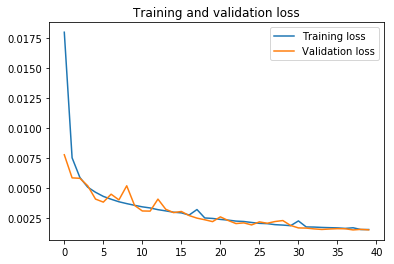

GENERATED


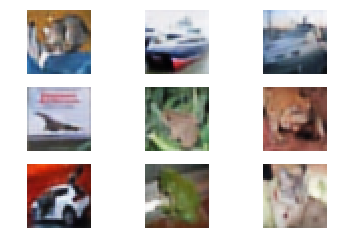

ORIGINAL


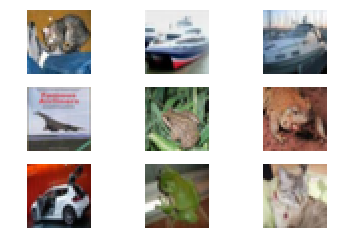

In [18]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test set results
print('GENERATED')
for i in range(9):
    pred = autoencoder.predict(X_test[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(pred[0]))
plt.show()
    
print('ORIGINAL')
for i in range(9):
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(np.squeeze(X_test[i])))
plt.show()

## Using Binary Crossentropy as the loss function

In [19]:
k.clear_session()

In [20]:
batch_size = 128
epochs = 40
input_shape = (32,32,3)

def make_autoencoder(input_shape):
    generator = Sequential()
    generator.add(Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    
    generator.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='binary_crossentropy', optimizer = Adam(lr=0.0002, beta_1=0.5))

autoencoder.summary()

autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       110720    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 256)       0         
__________

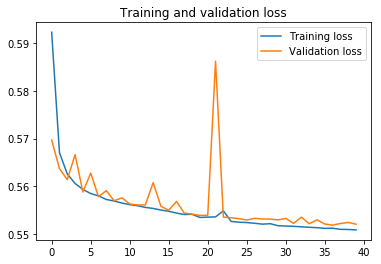

GENERATED


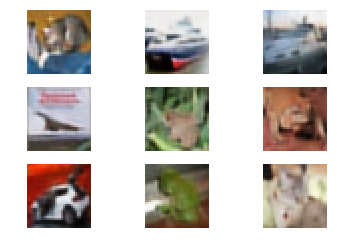

ORIGINAL


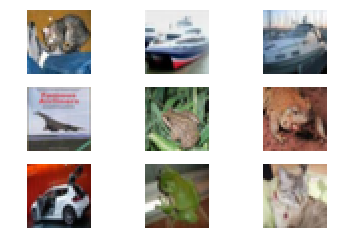

In [21]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



# Test set results
print('GENERATED')
for i in range(9):
    pred = autoencoder.predict(X_test[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(pred[0]))
plt.show()
    
print('ORIGINAL')
for i in range(9):
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(upscale(np.squeeze(X_test[i])))
plt.show()